## Comparing Associativity between different caches

In [14]:
import os, json
import pandas as pd
import matplotlib.pyplot as plt
import copy
import numpy as np
from glob import glob

results = {}
tempList = []
associativities = ['Direct', 'FA', 'SA']
for associativity in associativities:
    for f_name in glob('../cache_config/results/Direct_to_FA_comparaison/' + associativity + '/*.json'):
        with open('../cache_config_/' + f_name) as f:
            tempList.append(json.load(f))
    results[associativity] = copy.deepcopy(tempList)
    tempList = []

In [15]:
results

{'Direct': [{'amat': 11.600000000000001,
   'number_layers': 2,
   'caches': [{'size': 64,
     'hit_rate': 0.7391304347826086,
     'associativity': 'direct_mapped',
     'strategy': 'WRITE_THROUGH',
     'block_size': 8,
     'access_time': 3},
    {'size': 128,
     'hit_rate': 0.6666666666666666,
     'associativity': 'direct_mapped',
     'strategy': 'WRITE_THROUGH',
     'block_size': 16,
     'access_time': 8}],
   'amat_write': 61.0,
   'MMAT': 50,
   'benchmark_name': 'compitomin.s',
   'amat_read': 9.118721461187215},
  {'amat': 16.08695652173913,
   'number_layers': 1,
   'caches': [{'size': 512,
     'hit_rate': 0.9782608695652174,
     'associativity': 'direct_mapped',
     'strategy': 'WRITE_BACK',
     'block_size': 32,
     'access_time': 15}],
   'amat_write': 24.09090909090909,
   'MMAT': 50,
   'benchmark_name': 'compitomin.s',
   'amat_read': 15.684931506849315},
  {'amat': 7.043478260869565,
   'number_layers': 3,
   'caches': [{'size': 64,
     'hit_rate': 0.71739

In [17]:
def average(results, keyword):
    avrg = 0    
    for result in results:
        avrg += result[keyword]
        
    return avrg / len(results)
    

# Define the name of the variables of interest
interest_var = ['amat', 'amat_read', 'amat_write']
amat_results = {}

for var in interest_var:
    amat_results[var] = []
    for associativity in associativities:
        amat_results[var].append(average(results[associativity], var))
    amat_results[var] = tuple(amat_results[var])

amat values:
	amat_Direct = 11.5768115942029 cycles
	amat_FA = 12.853623188405797 cycles
	amat_SA = 14.006832298136645 cycles

amat_read values:
	amat_read_Direct = 10.449010654490108 cycles
	amat_read_FA = 11.691019786910198 cycles
	amat_read_SA = 13.013698630136986 cycles

amat_write values:
	amat_write_Direct = 34.03030303030303 cycles
	amat_write_FA = 36.0 cycles
	amat_write_SA = 33.77922077922078 cycles



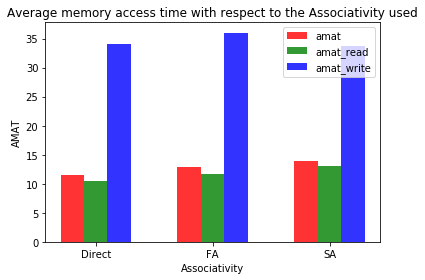

In [20]:
# data to plot
n_groups = len(associativities)
colors = ['r', 'g', 'b']
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.2
opacity = 0.8

count = 0
for var in interest_var:
    print(var + " values:")
    for associativity in associativities:
        print('\t' + var + '_' + associativity + " = " + str(amat_results[var][associativities.index(associativity)]) + ' cycles')
    plt.bar(index + count * bar_width, amat_results[var], bar_width,
        alpha=opacity,
        color=colors[count],
        label=var)
    count += 1
    print()

plt.xlabel('Associativity')
plt.ylabel('AMAT')
plt.title('Average memory access time with respect to the Associativity used')
plt.xticks(index + bar_width, associativities)
plt.legend()
 
plt.tight_layout()
plt.show()